In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('bitcoin.csv',header=None)
data.columns = ['Months','Price']

data.head()

,Months,Price
0,0,217.4
1,1,255.7
2,2,244.3
3,3,236.1
4,4,228.7


we are using 2018 data.

In [3]:
from datetime import date
from dateutil.relativedelta import relativedelta

for i in range(0,len(data.Months)):
    data.Months[i] = date(2018,1,1) + relativedelta(months=+i)

data.head()

,Months,Price
0,2018-01-01,217.4
1,2018-02-01,255.7
2,2018-03-01,244.3
3,2018-04-01,236.1
4,2018-05-01,228.7


In [4]:
data = data.set_index('Months')
data.head()

,Price
Months,
2018-01-01,217.4
2018-02-01,255.7
2018-03-01,244.3
2018-04-01,236.1
2018-05-01,228.7


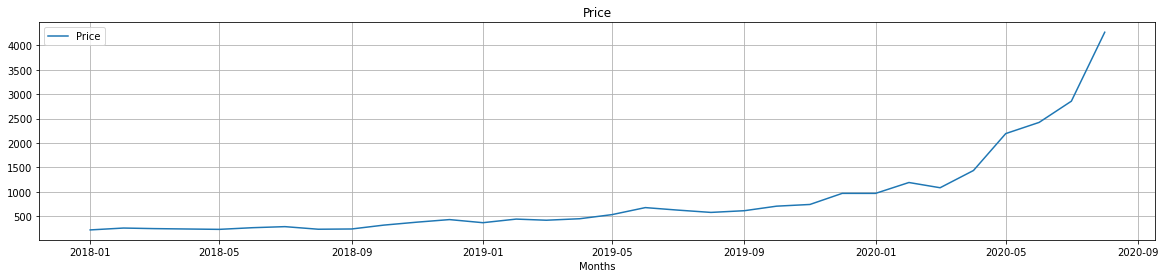

In [34]:
data.plot(figsize=(20, 4))
plt.grid()
plt.legend(loc='best')#location of the legend. ”best” (upper left)
plt.title('Price')
plt.show()

In [35]:
train_len = 29
train = data[0:train_len] # first 29 months as training set
test = data[train_len:] # last months as out-of-time test set

## Naive method

any constant value for prediction

we will use last value for prediction.

In [36]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Price'][train_len-1]

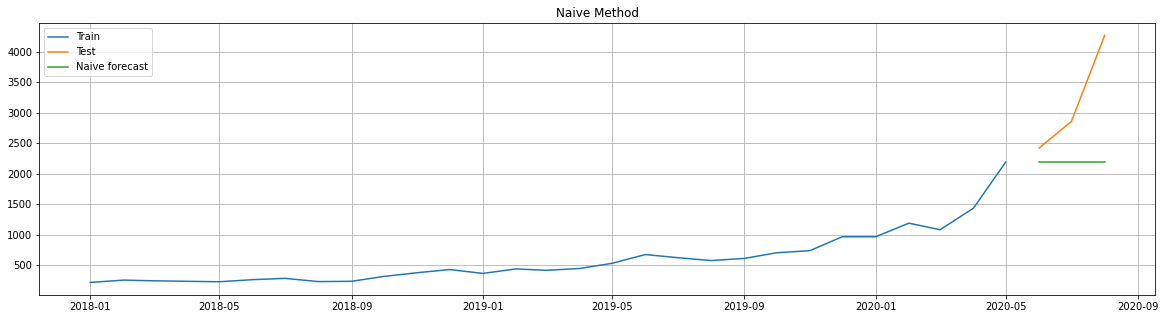

In [16]:
plt.figure(figsize=(20,5))
plt.grid()
#let plot different lines
plt.plot(train['Price'], label='Train')#1st line will of training data
plt.plot(test['Price'], label='Test')#2nd line will of testing data
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')#3rd is for prediction
plt.legend(loc='best')#set location to the best
plt.title('Naive Method')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_naive['naive_forecast'])/test['Price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


## Simple average forecast

if you want to see the trends in data, simple moving average is a great thing.



In [18]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Price'].mean()

In [19]:
train['Price'].mean()

595.7517241379311

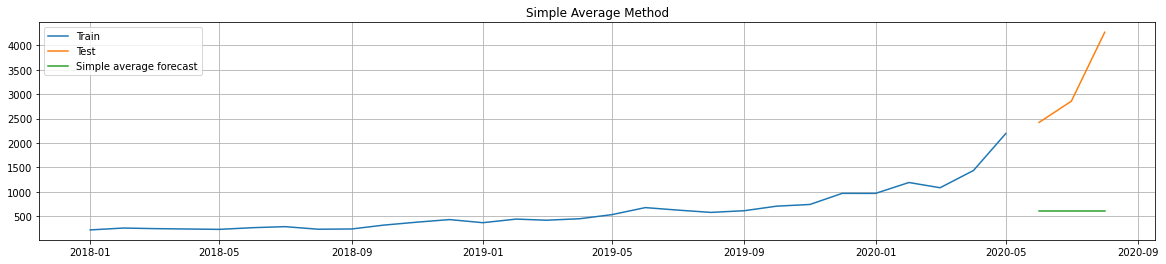

In [20]:
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [21]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_avg['avg_forecast'])/test['Price'])*100,2)

results= pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple average method,2703.73,80.19


## Simple moving average method -12

In [22]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

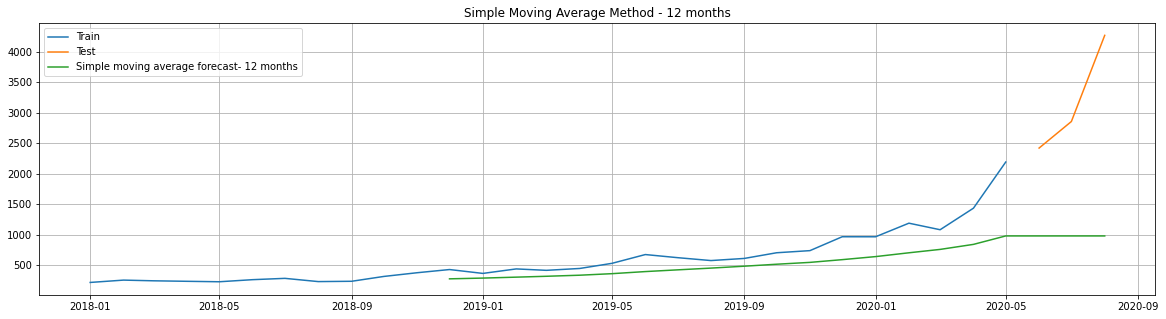

In [23]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast- 12 months')
plt.legend(loc='best')
plt.title('Simple Moving Average Method - 12 months')
plt.show()

In [24]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

results  = pd.DataFrame({'Method':['Simple moving average forecast-12 months'], 'RMSE': [rmse],'MAPE': [mape] })

results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast-12 months,2338.94,67.42


## Simple moving average method -6

In [25]:
y_hat_sma = data.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

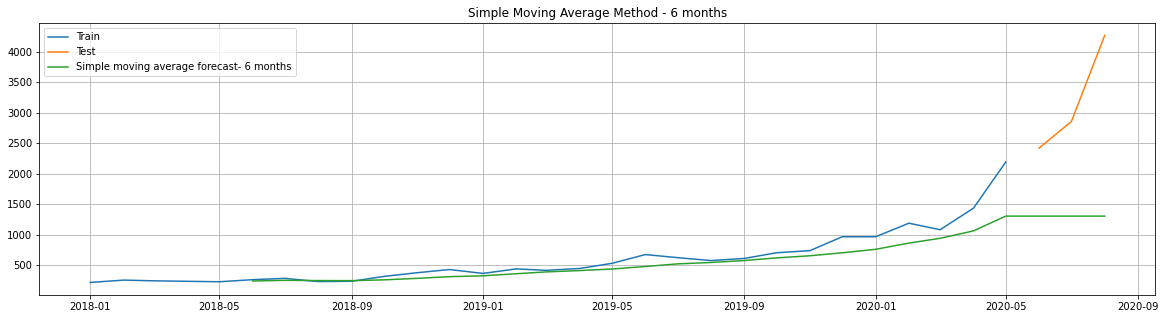

In [26]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast- 6 months')
plt.legend(loc='best')
plt.title('Simple Moving Average Method - 6 months')
plt.show()

In [27]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

results  = pd.DataFrame({'Method':['Simple moving average forecast-6 months'], 'RMSE': [rmse],'MAPE': [mape] })

results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast-6 months,2035.79,56.61


## Simple moving average method -3

In [28]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

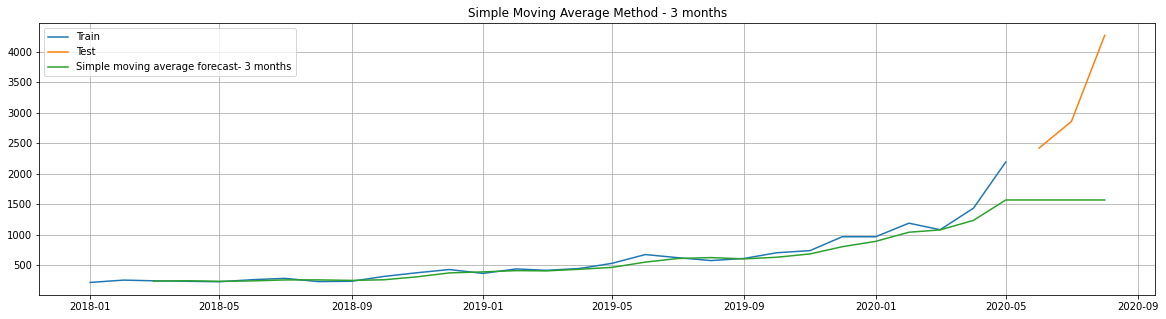

In [29]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast- 3 months')
plt.legend(loc='best')
plt.title('Simple Moving Average Method - 3 months')
plt.show()

In [30]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

results  = pd.DataFrame({'Method':['Simple moving average forecast-3 months'], 'RMSE': [rmse],'MAPE': [mape] })

results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast-3 months,1794.92,47.81


## Analyis of Moving Average Methods

In [31]:
y_hat_sma = data.copy()
ma_window12 =12
y_hat_sma['sma_forecast12'] = data['Price'].rolling(ma_window12).mean()
y_hat_sma['sma_forecast12'][train_len:] = y_hat_sma['sma_forecast12'][train_len-1]
ma_window6 =6
y_hat_sma['sma_forecast6'] = data['Price'].rolling(ma_window6).mean()
y_hat_sma['sma_forecast6'][train_len:] = y_hat_sma['sma_forecast6'][train_len-1]
ma_window3 =3
y_hat_sma['sma_forecast3'] = data['Price'].rolling(ma_window3).mean()
y_hat_sma['sma_forecast3'][train_len:] = y_hat_sma['sma_forecast3'][train_len-1]
ma_window1 =1
y_hat_sma['sma_forecast1'] = data['Price'].rolling(ma_window1).mean()
y_hat_sma['sma_forecast1'][train_len:] = y_hat_sma['sma_forecast1'][train_len-1]
ma_window9 =9
y_hat_sma['sma_forecast9'] = data['Price'].rolling(ma_window9).mean()
y_hat_sma['sma_forecast9'][train_len:] = y_hat_sma['sma_forecast9'][train_len-1]

In [32]:
y_hat_sma.head(20)

,Price,sma_forecast12,sma_forecast6,sma_forecast3,sma_forecast1,sma_forecast9
Months,,,,,,
2018-01-01,217.4,NaN,NaN,NaN,217.4,NaN
2018-02-01,255.7,NaN,NaN,NaN,255.7,NaN
2018-03-01,244.3,NaN,NaN,239.133333,244.3,NaN
2018-04-01,236.1,NaN,NaN,245.366667,236.1,NaN
2018-05-01,228.7,NaN,NaN,236.366667,228.7,NaN
2018-06-01,262.9,NaN,240.850000,242.566667,262.9,NaN
2018-07-01,284.5,NaN,252.033333,258.700000,284.5,NaN
2018-08-01,231.4,NaN,247.983333,259.600000,231.4,NaN
2018-09-01,236.5,NaN,246.683333,250.800000,236.5,244.166667


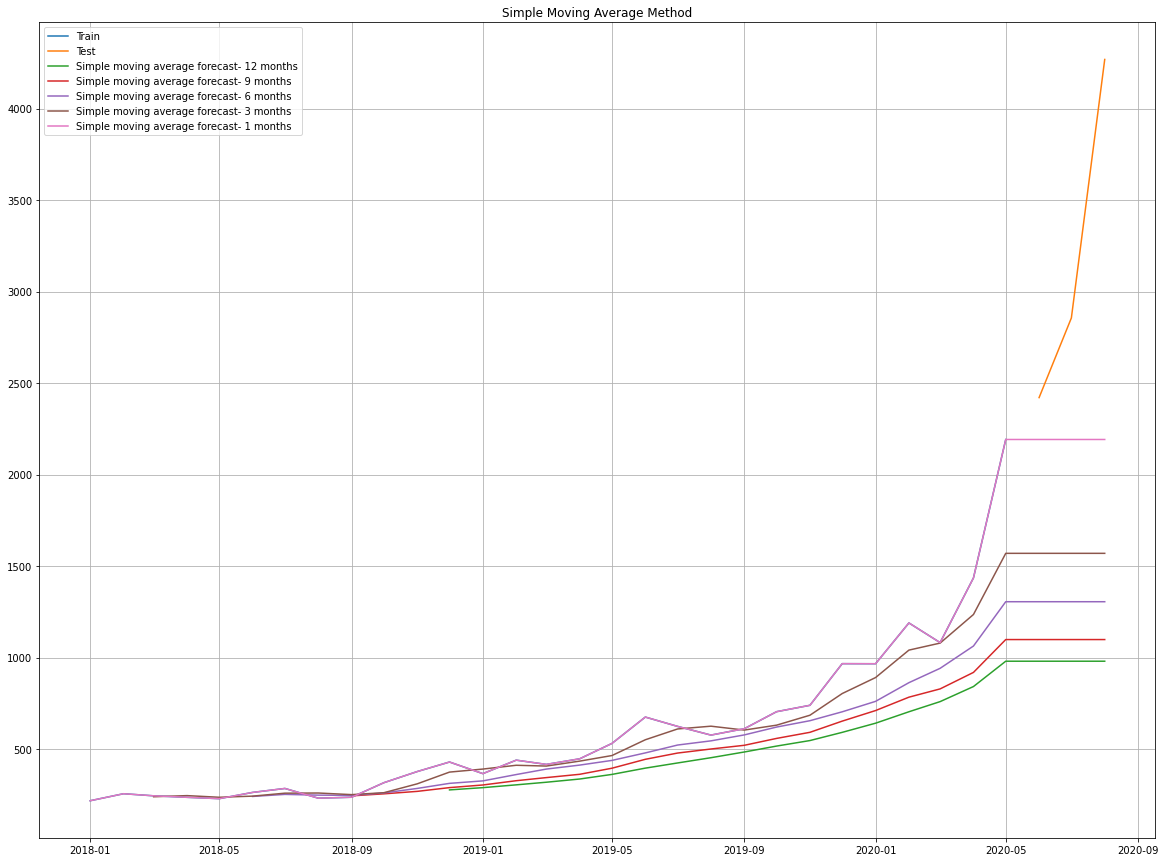

In [33]:
plt.figure(figsize=(20,15))
plt.grid()
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast12'], label='Simple moving average forecast- 12 months')
plt.plot(y_hat_sma['sma_forecast9'], label='Simple moving average forecast- 9 months')
plt.plot(y_hat_sma['sma_forecast6'], label='Simple moving average forecast- 6 months')
plt.plot(y_hat_sma['sma_forecast3'], label='Simple moving average forecast- 3 months')
plt.plot(y_hat_sma['sma_forecast1'], label='Simple moving average forecast- 1 months')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()